In [190]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Dense, GRU, Conv1D, MaxPooling1D, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# GENERAL TWEETS DATA

In [192]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/Bitcoin/GENERAL_FINBERT_BTC_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-01,998.325012,0.059485,0.018813,0.921702,963.658020,1003.080017,958.698975,147775008
1,2017-01-02,1021.750000,0.048735,0.226959,0.724306,998.617004,1031.390015,996.702026,222184992
2,2017-01-03,1043.839966,0.095558,0.019571,0.884871,1021.599976,1044.079956,1021.599976,185168000
3,2017-01-04,1154.729980,0.234489,0.015931,0.749580,1044.400024,1159.420044,1044.400024,344945984
4,2017-01-05,1013.380005,0.234489,0.015931,0.749580,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.038350,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,0.038350,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,0.038350,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,0.038350,0.080607,0.881043,36573.183594,36624.359375,35482.132812,37795577489


In [193]:
stock_data = stock_data.loc[(stock_data['Date'] >= '2017-03-01')]
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
59,2017-03-01,1222.500000,0.075622,0.033795,0.890584,1180.040039,1222.500000,1179.689941,229056992
60,2017-03-02,1251.010010,0.075622,0.033795,0.890584,1224.680054,1262.130005,1215.619995,368275008
61,2017-03-03,1274.989990,0.059867,0.103137,0.836996,1250.709961,1280.310059,1250.709961,315739008
62,2017-03-04,1255.150024,0.907405,0.011209,0.081386,1277.430054,1279.400024,1230.510010,183270000
63,2017-03-05,1267.119995,0.073982,0.019228,0.906790,1254.290039,1267.290039,1238.060059,134127000
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.038350,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,0.038350,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,0.038350,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,0.038350,0.080607,0.881043,36573.183594,36624.359375,35482.132812,37795577489


In [194]:
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-03-01,1222.500000,0.075622,0.033795,0.890584,1180.040039,1222.500000,1179.689941,229056992
2017-03-02,1251.010010,0.075622,0.033795,0.890584,1224.680054,1262.130005,1215.619995,368275008
2017-03-03,1274.989990,0.059867,0.103137,0.836996,1250.709961,1280.310059,1250.709961,315739008
2017-03-04,1255.150024,0.907405,0.011209,0.081386,1277.430054,1279.400024,1230.510010,183270000
2017-03-05,1267.119995,0.073982,0.019228,0.906790,1254.290039,1267.290039,1238.060059,134127000
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.038350,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,0.038350,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,0.038350,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317


In [195]:
stock_data.shape

(1894, 8)

In [196]:
stock_data.isna().sum()

Close       0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [197]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-03-01,1222.500000,0.075622,0.033795,0.890584,1180.040039,1222.500000,1179.689941,229056992
2017-03-02,1251.010010,0.075622,0.033795,0.890584,1224.680054,1262.130005,1215.619995,368275008
2017-03-03,1274.989990,0.059867,0.103137,0.836996,1250.709961,1280.310059,1250.709961,315739008
2017-03-04,1255.150024,0.907405,0.011209,0.081386,1277.430054,1279.400024,1230.510010,183270000
2017-03-05,1267.119995,0.073982,0.019228,0.906790,1254.290039,1267.290039,1238.060059,134127000
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.038350,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,0.038350,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,0.038350,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317


In [198]:
stock_data.isna().sum()

Close       0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [199]:
stock_data = stock_data.dropna()

In [200]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-03-01,1222.500000,0.075622,0.033795,0.890584,1180.040039,1222.500000,1179.689941,229056992
2017-03-02,1251.010010,0.075622,0.033795,0.890584,1224.680054,1262.130005,1215.619995,368275008
2017-03-03,1274.989990,0.059867,0.103137,0.836996,1250.709961,1280.310059,1250.709961,315739008
2017-03-04,1255.150024,0.907405,0.011209,0.081386,1277.430054,1279.400024,1230.510010,183270000
2017-03-05,1267.119995,0.073982,0.019228,0.906790,1254.290039,1267.290039,1238.060059,134127000
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.038350,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,0.038350,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,0.038350,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317


In [201]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1.894000e+03
mean,17673.083469,0.084403,0.090817,0.824779,17657.361769,18121.951656,17143.908395,2.215637e+10
std,17653.151092,0.060662,0.074528,0.090792,17656.995975,18112.321604,17128.395025,2.063342e+10
min,937.520020,0.015725,0.009743,0.062946,936.539978,975.760986,903.713013,1.341270e+08
25%,6363.762329,0.046978,0.037329,0.771109,6358.662354,6483.862427,6265.244873,5.191153e+09
50%,9235.087402,0.068344,0.062909,0.841295,9227.435059,9375.114746,9047.752930,1.842628e+10
75%,32353.070801,0.108075,0.124189,0.897904,32301.350098,33420.408203,31112.503906,3.307144e+10
max,67566.828125,0.907405,0.911935,0.955897,67549.734375,68789.625000,66382.062500,3.509679e+11


In [202]:
stock_data= stock_data.astype({"Volume":'float'})

In [203]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 2017-03-01 to 2022-05-07
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1894 non-null   float64
 1   negative  1894 non-null   float64
 2   neutral   1894 non-null   float64
 3   positive  1894 non-null   float64
 4   Open      1894 non-null   float64
 5   High      1894 non-null   float64
 6   Low       1894 non-null   float64
 7   Volume    1894 non-null   float64
dtypes: float64(8)
memory usage: 133.2+ KB


In [204]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1514
Number of records in Test Data: 380


In [205]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [206]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-03-02     1251.010010
2017-03-03     1274.989990
2017-03-04     1255.150024
2017-03-05     1267.119995
2017-03-06     1272.829956
                  ...     
2022-05-03    37750.453125
2022-05-04    39698.371094
2022-05-05    36575.140625
2022-05-06    36040.921875
2022-05-07    35501.953125
Name: Close, Length: 1893, dtype: float64

In [207]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.890584,0.890584,0.890584,0.890584,...,0.075622,0.033795,0.033795,0.033795,0.033795,0.033795,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.836996,0.863790,0.877187,0.883439,...,0.074605,0.103137,0.068466,0.051130,0.043040,0.038268,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.081386,0.472588,0.678237,0.776499,...,0.128334,0.011209,0.039837,0.041150,0.038796,0.036523,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906790,0.689689,0.735375,0.793871,...,0.124828,0.019228,0.029533,0.035669,0.036187,0.035407,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.929006,0.809348,0.783783,0.811889,...,0.119261,0.032447,0.030990,0.034864,0.035688,0.035216,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.881043,0.856201,0.852176,0.858945,...,0.056606,0.080607,0.085948,0.084490,0.081165,0.084255,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.881043,0.868622,0.859393,0.861891,...,0.055428,0.080607,0.083277,0.083519,0.081091,0.084020,3.675440e+10,37748.011719,39902.949219,37732.058594
2022-05-05,36575.140625,37740.509718,38246.368897,38865.290226,39970.947027,36040.921875,0.881043,0.874833,0.864805,0.864445,...,0.054326,0.080607,0.081942,0.082791,0.081026,0.083799,4.310626e+10,39695.746094,39789.281250,35856.515625


In [208]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.890584,0.890584,0.890584,0.890584,...,0.075622,0.033795,0.033795,0.033795,0.033795,0.033795,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.836996,0.863790,0.877187,0.883439,...,0.074605,0.103137,0.068466,0.051130,0.043040,0.038268,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.081386,0.472588,0.678237,0.776499,...,0.128334,0.011209,0.039837,0.041150,0.038796,0.036523,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906790,0.689689,0.735375,0.793871,...,0.124828,0.019228,0.029533,0.035669,0.036187,0.035407,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.929006,0.809348,0.783783,0.811889,...,0.119261,0.032447,0.030990,0.034864,0.035688,0.035216,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,38529.328125,38476.319934,38756.697340,39357.998793,40411.789300,37750.453125,0.830262,0.831359,0.842553,0.855545,...,0.057865,0.091850,0.091288,0.085784,0.081251,0.084506,3.292264e+10,38472.187500,39074.972656,38156.562500
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.881043,0.856201,0.852176,0.858945,...,0.056606,0.080607,0.085948,0.084490,0.081165,0.084255,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.881043,0.868622,0.859393,0.861891,...,0.055428,0.080607,0.083277,0.083519,0.081091,0.084020,3.675440e+10,37748.011719,39902.949219,37732.058594


In [209]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-03-02     1274.989990
2017-03-03     1255.150024
2017-03-04     1267.119995
2017-03-05     1272.829956
2017-03-06     1223.540039
                  ...     
2022-05-02    37750.453125
2022-05-03    39698.371094
2022-05-04    36575.140625
2022-05-05    36040.921875
2022-05-06    35501.953125
Name: close_price_shifted, Length: 1892, dtype: float64

In [210]:
y[:1513]

Date
2017-03-02     1274.989990
2017-03-03     1255.150024
2017-03-04     1267.119995
2017-03-05     1272.829956
2017-03-06     1223.540039
                  ...     
2021-04-18    55724.265625
2021-04-19    56473.031250
2021-04-20    53906.089844
2021-04-21    51762.273438
2021-04-22    51093.652344
Name: close_price_shifted, Length: 1513, dtype: float64

In [211]:
y[1513:]

Date
2021-04-23    50050.867188
2021-04-24    49004.253906
2021-04-25    54021.753906
2021-04-26    55033.117188
2021-04-27    54824.703125
                  ...     
2022-05-02    37750.453125
2022-05-03    39698.371094
2022-05-04    36575.140625
2022-05-05    36040.921875
2022-05-06    35501.953125
Name: close_price_shifted, Length: 379, dtype: float64

In [212]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.890584,0.890584,0.890584,0.890584,...,0.075622,0.033795,0.033795,0.033795,0.033795,0.033795,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.836996,0.863790,0.877187,0.883439,...,0.074605,0.103137,0.068466,0.051130,0.043040,0.038268,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.081386,0.472588,0.678237,0.776499,...,0.128334,0.011209,0.039837,0.041150,0.038796,0.036523,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906790,0.689689,0.735375,0.793871,...,0.124828,0.019228,0.029533,0.035669,0.036187,0.035407,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.929006,0.809348,0.783783,0.811889,...,0.119261,0.032447,0.030990,0.034864,0.035688,0.035216,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,38529.328125,38476.319934,38756.697340,39357.998793,40411.789300,37750.453125,0.830262,0.831359,0.842553,0.855545,...,0.057865,0.091850,0.091288,0.085784,0.081251,0.084506,3.292264e+10,38472.187500,39074.972656,38156.562500
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.881043,0.856201,0.852176,0.858945,...,0.056606,0.080607,0.085948,0.084490,0.081165,0.084255,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.881043,0.868622,0.859393,0.861891,...,0.055428,0.080607,0.083277,0.083519,0.081091,0.084020,3.675440e+10,37748.011719,39902.949219,37732.058594


In [213]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = preprocessing.StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = preprocessing.StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 1251.01000977,  1236.75500488,  1229.62750244, ...,
          1224.68005371,  1262.13000488,  1215.61999512],
        [ 1274.98999023,  1255.87249756,  1240.96812439, ...,
          1250.70996094,  1280.31005859,  1250.70996094],
        [ 1255.15002441,  1255.51126099,  1244.5135994 , ...,
          1277.43005371,  1279.40002441,  1230.51000977],
        ...,
        [39698.37109375, 38905.87881164, 38803.44498823, ...,
         37748.01171875, 39902.94921875, 37732.05859375],
        [36575.140625  , 37740.50971832, 38246.36889742, ...,
         39695.74609375, 39789.28125   , 35856.515625  ],
        [36040.921875  , 36890.71579666, 37695.00714182, ...,
         36573.18359375, 36624.359375  , 35482.1328125 ]]),
 array([[ 1274.98999023],
        [ 1255.15002441],
        [ 1267.11999512],
        ...,
        [36575.140625  ],
        [36040.921875  ],
        [35501.953125  ]]))

In [214]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1514, 25) and y: (1514, 1)
Number of rows and columns in the Test set X: (377, 25) and y: (377, 1)


In [215]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [216]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1514, 25, 1)
Shape of Test set X: (377, 25, 1)


# MODEL FOR GENERAL TWEETS

In [217]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf
import random 
import os
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model1=Sequential()
model1.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model1.add(Dropout(0.4))
model1.add((GRU(200,return_sequences=True,activation='tanh')))
model1.add(Dropout(0.4))
model1.add((GRU(150,activation='tanh', return_sequences=True)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(1, activation = 'linear'))

# printing the model summary
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 25, 250)           189750    
                                                                 
 dropout_18 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_19 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_19 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_20 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_20 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_6 (Flatten)         (None, 3750)             

In [218]:
import tensorflow as tf
model1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/100
86/86 [==============================] - 20s 158ms/step - loss: 0.0981 - val_loss: 3.5406
Epoch 2/100
86/86 [==============================] - 12s 141ms/step - loss: 0.0230 - val_loss: 0.7121
Epoch 3/100
86/86 [==============================] - 12s 137ms/step - loss: 0.0088 - val_loss: 0.3853
Epoch 4/100
86/86 [==============================] - 12s 142ms/step - loss: 0.0079 - val_loss: 0.3501
Epoch 5/100
86/86 [==============================] - 12s 143ms/step - loss: 0.0087 - val_loss: 0.4760
Epoch 6/100
86/86 [==============================] - 12s 142ms/step - loss: 0.0091 - val_loss: 0.4328
Epoch 7/100
86/86 [==============================] - 12s 139ms/step - loss: 0.0080 - val_loss: 0.5088
Epoch 8/100
86/86 [==============================] - 12s 137ms/step - loss: 0.0070 - val_loss: 0.2681
Epoch 9/100
86/86 [==============================] - 12s 139ms/step - loss: 0.0068 - val_loss: 0.2767
Epoch 10/100
86/86 [==============================] - 12s 138ms/step - loss: 0.007

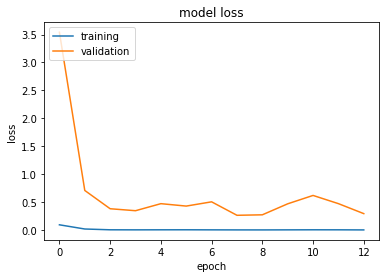

In [219]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [220]:
# performing predictions
predictions1 = model1.predict(X_test) 

# unscaling the predictions
predictions1 = scaler_y.inverse_transform(np.array(predictions1).reshape((len(predictions1), 1)))

# printing the predictions
print('Predictions:')
predictions1

Predictions:


array([[46326.973],
       [47423.145],
       [47776.867],
       [47778.812],
       [47779.426],
       [48805.64 ],
       [48942.824],
       [48775.887],
       [48911.58 ],
       [48895.08 ],
       [49440.   ],
       [49574.88 ],
       [49858.926],
       [50201.84 ],
       [50104.414],
       [49799.355],
       [49020.867],
       [47640.484],
       [47329.34 ],
       [45895.676],
       [44947.68 ],
       [44206.78 ],
       [43259.125],
       [41677.188],
       [41249.535],
       [40309.027],
       [39033.965],
       [37699.54 ],
       [37308.64 ],
       [37571.07 ],
       [37418.863],
       [37383.926],
       [36719.61 ],
       [35918.066],
       [34255.363],
       [34026.645],
       [34494.355],
       [34413.23 ],
       [34709.492],
       [35097.504],
       [34663.574],
       [34218.168],
       [33692.57 ],
       [33024.285],
       [33224.977],
       [34176.547],
       [34180.25 ],
       [34102.32 ],
       [34493.582],
       [35498.207],


# EXECUTIVE TWEETS DATA

In [221]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/Bitcoin/EXEC_FINBERT_BTC_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.053084,0.023169,0.923746,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,NaN,NaN,NaN,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,NaN,NaN,NaN,39695.746094,39789.281250,35856.515625,43106256317


In [222]:
stock_data.shape

(1953, 8)

In [223]:
stock_data.isna().sum()

Close          0
negative    1711
neutral     1711
positive    1711
Open           0
High           0
Low            0
Volume         0
dtype: int64

In [224]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.053084,0.023169,0.923746,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,0.053084,0.023169,0.923746,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,0.053084,0.023169,0.923746,39695.746094,39789.281250,35856.515625,43106256317


In [225]:
stock_data.isna().sum()

Close        0
negative    59
neutral     59
positive    59
Open         0
High         0
Low          0
Volume       0
dtype: int64

In [226]:
stock_data = stock_data.dropna()

In [227]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-03-01,1222.500000,0.071721,0.012185,0.916093,1180.040039,1222.500000,1179.689941,229056992
2017-03-02,1251.010010,0.072890,0.013520,0.913590,1224.680054,1262.130005,1215.619995,368275008
2017-03-03,1274.989990,0.074059,0.014855,0.911086,1250.709961,1280.310059,1250.709961,315739008
2017-03-04,1255.150024,0.075228,0.016189,0.908582,1277.430054,1279.400024,1230.510010,183270000
2017-03-05,1267.119995,0.076397,0.017524,0.906078,1254.290039,1267.290039,1238.060059,134127000
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.053084,0.023169,0.923746,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,0.053084,0.023169,0.923746,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,0.053084,0.023169,0.923746,39695.746094,39789.281250,35856.515625,43106256317


In [228]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1.894000e+03
mean,17673.083469,0.112964,0.131867,0.755169,17657.361769,18121.951656,17143.908395,2.215637e+10
std,17653.151092,0.139714,0.181802,0.208844,17656.995975,18112.321604,17128.395025,2.063342e+10
min,937.520020,0.007380,0.008560,0.018575,936.539978,975.760986,903.713013,1.341270e+08
25%,6363.762329,0.042907,0.025875,0.670035,6358.662354,6483.862427,6265.244873,5.191153e+09
50%,9235.087402,0.060395,0.043378,0.844414,9227.435059,9375.114746,9047.752930,1.842628e+10
75%,32353.070801,0.114335,0.157979,0.911698,32301.350098,33420.408203,31112.503906,3.307144e+10
max,67566.828125,0.921006,0.970479,0.951467,67549.734375,68789.625000,66382.062500,3.509679e+11


In [229]:
stock_data= stock_data.astype({"Volume":'float'})

In [230]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 2017-03-01 to 2022-05-07
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1894 non-null   float64
 1   negative  1894 non-null   float64
 2   neutral   1894 non-null   float64
 3   positive  1894 non-null   float64
 4   Open      1894 non-null   float64
 5   High      1894 non-null   float64
 6   Low       1894 non-null   float64
 7   Volume    1894 non-null   float64
dtypes: float64(8)
memory usage: 133.2+ KB


In [231]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1514
Number of records in Test Data: 380


In [232]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [233]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-03-02     1251.010010
2017-03-03     1274.989990
2017-03-04     1255.150024
2017-03-05     1267.119995
2017-03-06     1272.829956
                  ...     
2022-05-03    37750.453125
2022-05-04    39698.371094
2022-05-05    36575.140625
2022-05-06    36040.921875
2022-05-07    35501.953125
Name: Close, Length: 1893, dtype: float64

In [234]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.913590,0.914841,0.915467,0.915759,...,0.071797,0.013520,0.012853,0.012519,0.012363,0.012272,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.911086,0.912964,0.914372,0.915136,...,0.071943,0.014855,0.013854,0.013103,0.012696,0.012438,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.908582,0.910773,0.912924,0.914262,...,0.072155,0.016189,0.015022,0.013875,0.013161,0.012680,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906078,0.908426,0.911213,0.913171,...,0.072428,0.017524,0.016273,0.014787,0.013743,0.012993,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.903575,0.906000,0.909303,0.911892,...,0.072760,0.018859,0.017566,0.015805,0.014425,0.013371,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.923746,0.626317,0.563005,0.561380,...,0.069276,0.023169,0.326986,0.381254,0.376582,0.319951,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.923746,0.775032,0.653190,0.609696,...,0.068232,0.023169,0.175078,0.291733,0.329460,0.300804,3.675440e+10,37748.011719,39902.949219,37732.058594
2022-05-05,36575.140625,37740.509718,38246.368897,38865.290226,39970.947027,36040.921875,0.923746,0.849389,0.720829,0.651569,...,0.067254,0.023169,0.099124,0.224592,0.288621,0.282892,4.310626e+10,39695.746094,39789.281250,35856.515625


In [235]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.913590,0.914841,0.915467,0.915759,...,0.071797,0.013520,0.012853,0.012519,0.012363,0.012272,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.911086,0.912964,0.914372,0.915136,...,0.071943,0.014855,0.013854,0.013103,0.012696,0.012438,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.908582,0.910773,0.912924,0.914262,...,0.072155,0.016189,0.015022,0.013875,0.013161,0.012680,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906078,0.908426,0.911213,0.913171,...,0.072428,0.017524,0.016273,0.014787,0.013743,0.012993,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.903575,0.906000,0.909303,0.911892,...,0.072760,0.018859,0.017566,0.015805,0.014425,0.013371,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,38529.328125,38476.319934,38756.697340,39357.998793,40411.789300,37750.453125,0.177683,0.328888,0.442758,0.505632,...,0.070393,0.805631,0.630803,0.500616,0.430953,0.340419,3.292264e+10,38472.187500,39074.972656,38156.562500
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.923746,0.626317,0.563005,0.561380,...,0.069276,0.023169,0.326986,0.381254,0.376582,0.319951,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.923746,0.775032,0.653190,0.609696,...,0.068232,0.023169,0.175078,0.291733,0.329460,0.300804,3.675440e+10,37748.011719,39902.949219,37732.058594


In [236]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-03-02     1274.989990
2017-03-03     1255.150024
2017-03-04     1267.119995
2017-03-05     1272.829956
2017-03-06     1223.540039
                  ...     
2022-05-02    37750.453125
2022-05-03    39698.371094
2022-05-04    36575.140625
2022-05-05    36040.921875
2022-05-06    35501.953125
Name: close_price_shifted, Length: 1892, dtype: float64

In [237]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.913590,0.914841,0.915467,0.915759,...,0.071797,0.013520,0.012853,0.012519,0.012363,0.012272,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.911086,0.912964,0.914372,0.915136,...,0.071943,0.014855,0.013854,0.013103,0.012696,0.012438,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.908582,0.910773,0.912924,0.914262,...,0.072155,0.016189,0.015022,0.013875,0.013161,0.012680,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906078,0.908426,0.911213,0.913171,...,0.072428,0.017524,0.016273,0.014787,0.013743,0.012993,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.903575,0.906000,0.909303,0.911892,...,0.072760,0.018859,0.017566,0.015805,0.014425,0.013371,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,38529.328125,38476.319934,38756.697340,39357.998793,40411.789300,37750.453125,0.177683,0.328888,0.442758,0.505632,...,0.070393,0.805631,0.630803,0.500616,0.430953,0.340419,3.292264e+10,38472.187500,39074.972656,38156.562500
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.923746,0.626317,0.563005,0.561380,...,0.069276,0.023169,0.326986,0.381254,0.376582,0.319951,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.923746,0.775032,0.653190,0.609696,...,0.068232,0.023169,0.175078,0.291733,0.329460,0.300804,3.675440e+10,37748.011719,39902.949219,37732.058594


In [238]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 1251.01000977,  1236.75500488,  1229.62750244, ...,
          1224.68005371,  1262.13000488,  1215.61999512],
        [ 1274.98999023,  1255.87249756,  1240.96812439, ...,
          1250.70996094,  1280.31005859,  1250.70996094],
        [ 1255.15002441,  1255.51126099,  1244.5135994 , ...,
          1277.43005371,  1279.40002441,  1230.51000977],
        ...,
        [39698.37109375, 38905.87881164, 38803.44498823, ...,
         37748.01171875, 39902.94921875, 37732.05859375],
        [36575.140625  , 37740.50971832, 38246.36889742, ...,
         39695.74609375, 39789.28125   , 35856.515625  ],
        [36040.921875  , 36890.71579666, 37695.00714182, ...,
         36573.18359375, 36624.359375  , 35482.1328125 ]]),
 array([[ 1274.98999023],
        [ 1255.15002441],
        [ 1267.11999512],
        ...,
        [36575.140625  ],
        [36040.921875  ],
        [35501.953125  ]]))

In [239]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1514, 25) and y: (1514, 1)
Number of rows and columns in the Test set X: (377, 25) and y: (377, 1)


In [240]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [241]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1514, 25, 1)
Shape of Test set X: (377, 25, 1)


# MODEL FOR EXECUTIVE TWEETS

In [242]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf 
import random
import os
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model2=Sequential()
model2.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model2.add(Dropout(0.4))
model2.add((GRU(200,return_sequences=True,activation='tanh')))
model2.add(Dropout(0.4))
model2.add((GRU(150,activation='tanh', return_sequences=True)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(1, activation = 'linear'))

# printing the model summary
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_21 (GRU)                (None, 25, 250)           189750    
                                                                 
 dropout_21 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_22 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_22 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_23 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_23 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_7 (Flatten)         (None, 3750)             

In [243]:
import tensorflow as tf

model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/100
86/86 [==============================] - 21s 152ms/step - loss: 0.0999 - val_loss: 2.8914
Epoch 2/100
86/86 [==============================] - 12s 137ms/step - loss: 0.0224 - val_loss: 0.7825
Epoch 3/100
86/86 [==============================] - 12s 141ms/step - loss: 0.0104 - val_loss: 0.4105
Epoch 4/100
86/86 [==============================] - 12s 140ms/step - loss: 0.0103 - val_loss: 0.6225
Epoch 5/100
86/86 [==============================] - 12s 141ms/step - loss: 0.0131 - val_loss: 0.6165
Epoch 6/100
86/86 [==============================] - 12s 139ms/step - loss: 0.0139 - val_loss: 0.5334
Epoch 7/100
86/86 [==============================] - 12s 137ms/step - loss: 0.0097 - val_loss: 0.4559
Epoch 8/100
86/86 [==============================] - 12s 141ms/step - loss: 0.0105 - val_loss: 0.3567
Epoch 9/100
86/86 [==============================] - 12s 140ms/step - loss: 0.0088 - val_loss: 0.3760
Epoch 10/100
86/86 [==============================] - 12s 140ms/step - loss: 0.010

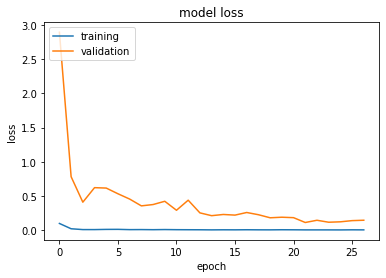

In [244]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [245]:
# performing predictions
predictions2 = model2.predict(X_test) 

# unscaling the predictions
predictions2 = scaler_y.inverse_transform(np.array(predictions2).reshape((len(predictions2), 1)))

# printing the predictions
print('Predictions:')
predictions2

Predictions:


array([[49188.516],
       [50561.13 ],
       [51034.03 ],
       [51054.75 ],
       [51010.57 ],
       [52156.387],
       [52367.016],
       [52173.07 ],
       [52304.824],
       [51923.12 ],
       [52544.715],
       [52685.32 ],
       [53005.094],
       [53424.49 ],
       [53315.484],
       [52918.676],
       [52137.836],
       [50454.6  ],
       [49978.8  ],
       [48793.977],
       [47671.26 ],
       [46795.504],
       [45604.43 ],
       [43955.79 ],
       [43001.42 ],
       [39935.06 ],
       [40732.055],
       [39559.793],
       [39006.742],
       [39464.97 ],
       [39378.99 ],
       [39424.703],
       [38773.113],
       [37824.418],
       [36890.047],
       [36686.715],
       [37182.676],
       [37079.098],
       [37372.2  ],
       [37806.105],
       [37263.297],
       [36502.266],
       [35957.81 ],
       [35184.695],
       [35275.67 ],
       [36377.03 ],
       [36435.414],
       [36373.27 ],
       [36177.086],
       [37273.816],


# Unscaling

In [246]:
# unscaling the test feature dataset, x_test
# unscaling the test y dataset, y_test+
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

# Comparision

###  Plotting

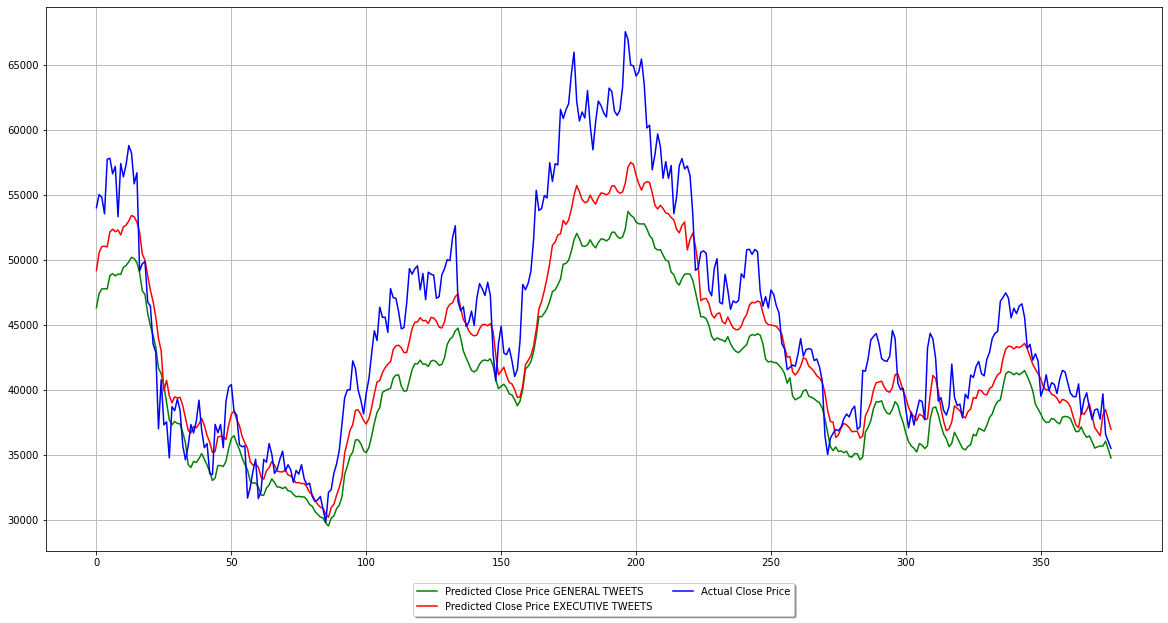

In [247]:

plt.figure(figsize=(20,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions1,'-g', label="Predicted Close Price GENERAL TWEETS")
plt.plot(predictions2,'-r', label="Predicted Close Price EXECUTIVE TWEETS")
plt.plot([row[0] for row in y_test],color = 'b', label="Actual Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.grid()
plt.show()


### Mean Absolute Error

In [248]:
from sklearn.metrics import mean_absolute_error

print("MAE general",mean_absolute_error(y_test,predictions1))
print("MAE executive",mean_absolute_error(y_test,predictions2))

MAE general 4681.737265832228
MAE executive 2842.190717216512


### MSE and RMSE SCORE

In [249]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE1 = np.square(np.subtract(y_test,predictions1)).mean() 
MSE2 = np.square(np.subtract(y_test,predictions2)).mean() 

print("MSE general",MSE1)
print("MSE executive",MSE2)

RMSE1 = MSE1
RMSE2 = MSE2

print('Root Mean Square Error General Tweets (sklearn.metrics) =', round(np.sqrt(RMSE1),4))
print('Root Mean Square Error Executive Tweets (sklearn.metrics) =', round(np.sqrt(RMSE2),4))

MSE general 31185945.004879877
MSE executive 13540255.115274314
Root Mean Square Error General Tweets (sklearn.metrics) = 5584.4378
Root Mean Square Error Executive Tweets (sklearn.metrics) = 3679.7086


### R2

In [250]:
from sklearn.metrics import r2_score
r2 =[ r2_score(y_test,predictions1), r2_score(y_test,predictions2)]
print('R2 general',r2[0])
print('R2 executive',r2[1])

R2 general 0.5727219170725102
R2 executive 0.8144852032831374


### MAPE

In [251]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    
print("MAPE General",MAPE(y_test,predictions1), "%")
print("MAPE Executive",MAPE(y_test,predictions2), "%")

MAPE General 9.675819142686704 %
MAPE Executive 5.8306180421711336 %


### Conclusion
 General Tweets can affect the stock market better than Executive Tweets

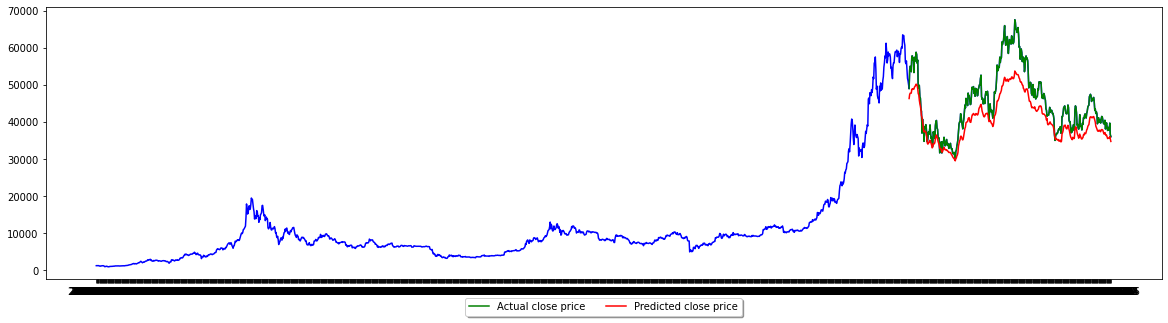

In [252]:
val = data[len(y_train)+1:]
val['pred'] = predictions1
plt.figure(figsize = (20,5))
plt.plot(data['close_price'], color = 'b')
plt.plot(val['close_price'], label = 'Actual close price', color = 'g')
plt.plot(val['pred'], label = 'Predicted close price', color = 'r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()